total= 837 >512 103


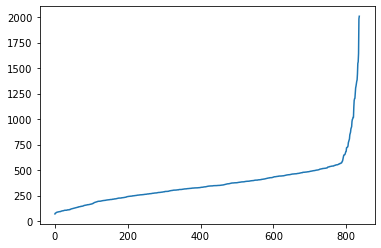

[70, 77, 78, 80, 84, 86, 87, 88, 90, 90, 90, 91, 92, 92, 92, 93, 94, 97, 98, 99, 100, 101, 101, 101, 102, 104, 105, 106, 106, 106, 106, 106, 106, 108, 108, 110, 110, 110, 110, 110, 113, 113, 113, 116, 118, 119, 120, 121, 121, 124, 124, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 135, 138, 138, 140, 140, 140, 141, 143, 144, 144, 144, 146, 146, 146, 148, 149, 150, 153, 153, 154, 155, 156, 157, 157, 157, 158, 160, 160, 160, 161, 161, 162, 163, 164, 165, 166, 167, 167, 167, 169, 171, 171, 174, 175, 178, 181, 182, 183, 185, 185, 187, 187, 188, 190, 192, 193, 194, 194, 194, 194, 195, 195, 195, 196, 196, 197, 198, 200, 200, 200, 201, 202, 202, 202, 203, 203, 204, 205, 206, 206, 206, 207, 208, 208, 208, 209, 209, 210, 210, 211, 211, 212, 212, 212, 212, 214, 214, 215, 215, 215, 217, 217, 217, 218, 218, 219, 220, 222, 222, 223, 223, 224, 225, 225, 225, 225, 225, 226, 226, 226, 228, 228, 228, 229, 230, 230, 230, 231, 232, 233, 234, 234, 234, 236, 239, 239, 239, 240, 241, 242, 242,

In [20]:
import os
import matplotlib.pyplot as plt
import csv
import numpy as np
import json

from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('/home/xx/pretrained_model/roberta-base')

def save_csv(file_name, data):
    with open(file_name, 'w', encoding='UTF-8') as writer:
        tsv_w = csv.writer(writer)
        tsv_w.writerow(['article', 'question','label', 'option_0','option_1','option_2','option_3','option_4',
        'label'
        ])  # 单行写入
        tsv_w.writerows(data)  # 多行写入


def load_data(path):
    """
    读取数据和标签
    :param path:数据集文件夹路径
    :return:返回读取的片段和对应的标签
    """
    data = []
    
    # 定义lebel到数字的映射关系
    labels = {'LX': 0, 'MY': 1, 'QZS': 2, 'WXB': 3, 'ZAL': 4}
    opt = ['option_0','option_1','option_2','option_3','option_4']


    files = os.listdir(path)
    for file in files:
        if not os.path.isdir(file):
            if 'train' in file:
                continue
            f = open(path + "/" + file, 'r', encoding='UTF-8');  # 打开文件
            for index,line in enumerate(f.readlines()):
                json_f = json.loads(line)
                t = []
                t.append(json_f['article'].replace('"',''))
                t.append(json_f['question'].replace('"',''))
                for op in opt:
                    t.append(json_f[op])
                t.append(json_f['label'])

                data.append(t)
    return data

data_path = './training_data/dev.jsonl'
# train_data = load_data(data_path)

def count_words(sen):
    cnt = 0
    for w in sen:
        if w == ' ':
            cnt += 1
    return cnt


with open(data_path, 'r') as file:
    len_max = 0
    cnt = 0
    total = 0
    token_size = []
    for line in file.readlines():
        total += 1
        t = json.loads(line)
        article = t['article'] + t['question']
        len_tokens = len(tokenizer(article)['input_ids'])
        token_size.append(len_tokens)
        if len_tokens > 512:
            cnt += 1
        # len_max = min(count_words(t['article']), len_max)
        # if count_words(t['article']) > 400:
        #     cnt += 1
len_token_size = len(token_size) 

print('total=',total,'>512', cnt)
x = np.arange(0,len_token_size)
token_size.sort()
y = token_size[0:len_token_size]
plt.plot(x,y)
plt.show()
print(token_size)
# save_csv('./dataset/train.csv', train_data)

